In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading the "Features", "Sales" and, "Stores" Dataset.

In [2]:
# Loading the Features Dataset.
features_data = pd.read_csv("C:/Users/The Evil King/Desktop/Reading Materila/Assignments/Retail/Features_data_set.csv")
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
features_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [4]:
features_data.shape

(8190, 12)

In [5]:
features_data.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [6]:
# Loading the Sales Dataset.
sales_data = pd.read_csv("C:/Users/The Evil King/Desktop/Reading Materila/Assignments/Retail/sales_data_set.csv")
sales_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [7]:
sales_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
sales_data.shape

(421570, 5)

In [9]:
sales_data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [10]:
# Loading the Store Dataset.
stores_data = pd.read_csv("C:/Users/The Evil King/Desktop/Reading Materila/Assignments/Retail/stores_data_set.csv")
stores_data

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [11]:
stores_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [12]:
stores_data.shape

(45, 3)

In [13]:
stores_data.dtypes

Store     int64
Type     object
Size      int64
dtype: object

# Handleling the missing values in "Features" Dataset.

In [14]:
features_data['MarkDown1'].fillna(0, inplace=True)
features_data['MarkDown2'].fillna(0, inplace=True)
features_data['MarkDown3'].fillna(0, inplace=True)
features_data['MarkDown4'].fillna(0, inplace=True)
features_data['MarkDown5'].fillna(0, inplace=True)
features_data['CPI'].fillna(method='ffill', inplace=True)
features_data['Unemployment'].fillna(method='ffill', inplace=True)

In [15]:
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False


In [16]:
# Convert date columns to datetime format in "Features" and "Sales" Dateset.
features_data['Date'] = pd.to_datetime(features_data['Date'], format='%d/%m/%Y')
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False


In [17]:
# Extracting the date features from "features_data".
features_data['Year'] = features_data['Date'].dt.year
features_data['Month'] = features_data['Date'].dt.month
features_data['Week'] = features_data['Date'].dt.isocalendar().week
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,2010,2,5
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,2010,2,6
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,2010,2,7
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,2010,2,8
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,False,2013,6,26
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,False,2013,7,27
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,False,2013,7,28
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,False,2013,7,29


In [18]:
features_data.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Year                     int32
Month                    int32
Week                    UInt32
dtype: object

In [19]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d/%m/%Y')
sales_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [20]:
# Extracting the date features from "sales_data".
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,2010,2,5
1,1,1,2010-02-12,46039.49,True,2010,2,6
2,1,1,2010-02-19,41595.55,False,2010,2,7
3,1,1,2010-02-26,19403.54,False,2010,2,8
4,1,1,2010-03-05,21827.90,False,2010,3,9
...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39
421566,45,98,2012-10-05,628.10,False,2012,10,40
421567,45,98,2012-10-12,1061.02,False,2012,10,41
421568,45,98,2012-10-19,760.01,False,2012,10,42


In [21]:
sales_data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Year                     int32
Month                    int32
Week                    UInt32
dtype: object

In [22]:
scaler = StandardScaler()
features_data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] = scaler.fit_transform(
    features_data[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
)

In [23]:
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
0,1,2010-02-05,-0.912661,-1.933624,0.00,0.00,0.00,0.00,0.00,0.958510,0.190760,False,2010,2,5
1,1,2010-02-12,-1.116115,-1.989268,0.00,0.00,0.00,0.00,0.00,0.962165,0.190760,True,2010,2,6
2,1,2010-02-19,-1.040087,-2.068098,0.00,0.00,0.00,0.00,0.00,0.963342,0.190760,False,2010,2,7
3,1,2010-02-26,-0.681366,-1.959128,0.00,0.00,0.00,0.00,0.00,0.964106,0.190760,False,2010,2,8
4,1,2010-03-05,-0.688327,-1.810743,0.00,0.00,0.00,0.00,0.00,0.964871,0.190760,False,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,0.893794,0.540233,4842.29,975.03,3.00,2449.97,3169.69,0.519691,0.312683,False,2013,6,26
8186,45,2013-07-05,0.971427,0.482270,9090.48,2268.58,582.74,5797.47,1514.93,0.519691,0.312683,False,2013,7,27
8187,45,2013-07-12,1.071548,0.482270,3789.94,1827.31,85.72,744.84,2150.36,0.519691,0.312683,False,2013,7,28
8188,45,2013-07-19,1.257333,0.767448,2961.49,1047.07,204.19,363.00,1059.46,0.519691,0.312683,False,2013,7,29


In [24]:
features_data.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Year                     int32
Month                    int32
Week                    UInt32
dtype: object

In [25]:
features_data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Year            0
Month           0
Week            0
dtype: int64

In [26]:
features_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,8190.0,23.0,1.0,12.0,23.0,34.0,45.0,12.987966
Date,8190,2011-10-31 12:00:00,2010-02-05 00:00:00,2010-12-17 00:00:00,2011-10-31 12:00:00,2012-09-14 00:00:00,2013-07-26 00:00:00,NaN
Temperature,8190.0,-0.0,-3.568268,-0.720317,0.072483,0.777611,2.280491,1.000061
Fuel_Price,8190.0,0.0,-2.165476,-0.84624,0.2481,0.781359,2.462284,1.000061
MarkDown1,8190.0,3462.090725,-2781.45,0.0,0.0,4639.585,103184.98,7388.916286
MarkDown2,8190.0,1206.981664,-265.76,0.0,0.0,98.59,104519.54,5495.556015
MarkDown3,8190.0,776.464219,-179.26,0.0,0.0,24.22,149483.31,7539.953758
MarkDown4,8190.0,1392.763115,0.0,0.0,0.0,774.6925,67474.85,4707.111488
MarkDown5,8190.0,2043.403725,-185.17,0.0,0.0,2680.295,771448.1,9431.223215
CPI,8190.0,-0.0,-1.172849,-1.007674,0.250654,1.040502,1.406679,1.000061


# Mergeing the "sales_data", and "features_data" and "stores_data" datasets for EDA.

In [27]:
merged_data = pd.merge(sales_data, features_data, on=['Store', 'Date', 'IsHoliday', 'Year', 'Month', 'Week'], how='left')

In [28]:
merged_data = pd.merge(merged_data, stores_data, on='Store', how='left')

In [29]:
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,2010,2,5,-0.912661,-1.933624,0.00,0.00,0.00,0.00,0.00,0.958510,0.190760,A,151315
1,1,1,2010-02-12,46039.49,True,2010,2,6,-1.116115,-1.989268,0.00,0.00,0.00,0.00,0.00,0.962165,0.190760,A,151315
2,1,1,2010-02-19,41595.55,False,2010,2,7,-1.040087,-2.068098,0.00,0.00,0.00,0.00,0.00,0.963342,0.190760,A,151315
3,1,1,2010-02-26,19403.54,False,2010,2,8,-0.681366,-1.959128,0.00,0.00,0.00,0.00,0.00,0.964106,0.190760,A,151315
4,1,1,2010-03-05,21827.90,False,2010,3,9,-0.688327,-1.810743,0.00,0.00,0.00,0.00,0.00,0.964871,0.190760,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39,0.295747,1.370262,4556.61,20.64,1.50,1601.01,3288.25,0.480194,0.498496,B,118221
421566,45,98,2012-10-05,628.10,False,2012,10,40,0.296282,1.342440,5046.74,0.00,18.82,2253.43,2340.01,0.484126,0.489445,B,118221
421567,45,98,2012-10-12,1061.02,False,2012,10,41,-0.261609,1.377218,1956.28,0.00,7.89,599.32,3990.54,0.488057,0.489445,B,118221
421568,45,98,2012-10-19,760.01,False,2012,10,42,-0.154528,1.305344,2004.02,0.00,3.18,437.73,1537.49,0.488147,0.489445,B,118221


In [30]:
merged_data.shape

(421570, 19)

In [31]:
merged_data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Year                     int32
Month                    int32
Week                    UInt32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [32]:
merged_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Year            0
Month           0
Week            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

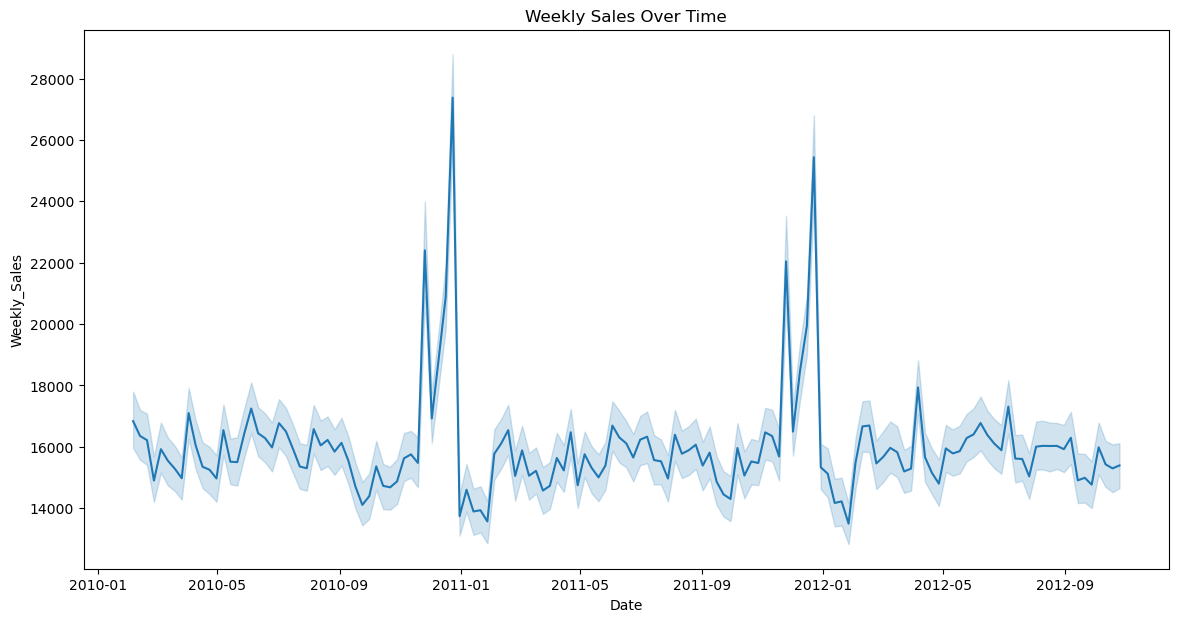

In [33]:
# Using the Line Plot to show "Weekly_Sales" and "Date".
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Weekly_Sales', data=merged_data)
plt.title('Weekly Sales Over Time')
plt.show()

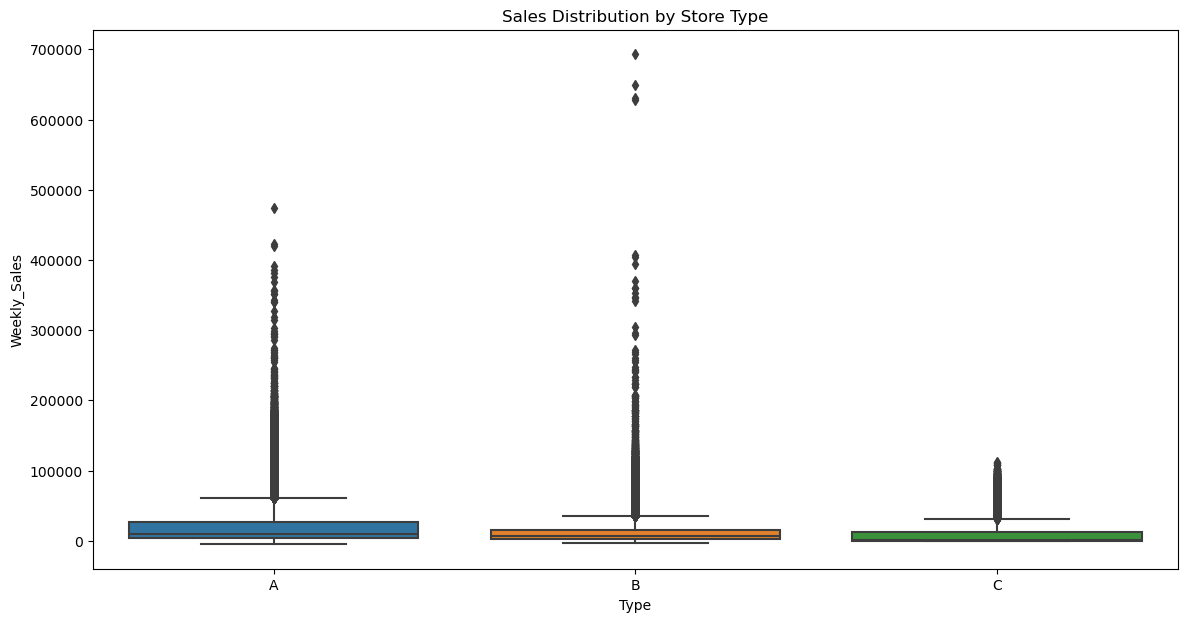

In [34]:
# Using the Box Plot to show "Weekly_Sales" and "Type".
plt.figure(figsize=(14, 7))
sns.boxplot(x='Type', y='Weekly_Sales', data=merged_data)
plt.title('Sales Distribution by Store Type')
plt.show()

In [35]:
# The Lagged sales feature.
merged_data['Lagged_Weekly_Sales'] = merged_data.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
merged_data['Lagged_Weekly_Sales']

0              NaN
1         24924.50
2         46039.49
3         41595.55
4         19403.54
            ...   
421565      467.30
421566      508.37
421567      628.10
421568     1061.02
421569      760.01
Name: Lagged_Weekly_Sales, Length: 421570, dtype: float64

In [36]:
# Rolling the average feature.
merged_data['Rolling_Mean_4w'] = merged_data.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=4).mean())
merged_data['Rolling_Mean_4w']

0                NaN
1                NaN
2                NaN
3         32990.7700
4         32216.6200
             ...    
421565      483.5175
421566      552.4325
421567      666.1975
421568      739.3750
421569      881.4825
Name: Rolling_Mean_4w, Length: 421570, dtype: float64

In [37]:
# Encoding the variables.
merged_data = pd.get_dummies(merged_data, columns=['Type'], drop_first=True)
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Temperature,Fuel_Price,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Lagged_Weekly_Sales,Rolling_Mean_4w,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,2010,2,5,-0.912661,-1.933624,...,0.00,0.00,0.00,0.958510,0.190760,151315,NaN,NaN,False,False
1,1,1,2010-02-12,46039.49,True,2010,2,6,-1.116115,-1.989268,...,0.00,0.00,0.00,0.962165,0.190760,151315,24924.50,NaN,False,False
2,1,1,2010-02-19,41595.55,False,2010,2,7,-1.040087,-2.068098,...,0.00,0.00,0.00,0.963342,0.190760,151315,46039.49,NaN,False,False
3,1,1,2010-02-26,19403.54,False,2010,2,8,-0.681366,-1.959128,...,0.00,0.00,0.00,0.964106,0.190760,151315,41595.55,32990.7700,False,False
4,1,1,2010-03-05,21827.90,False,2010,3,9,-0.688327,-1.810743,...,0.00,0.00,0.00,0.964871,0.190760,151315,19403.54,32216.6200,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39,0.295747,1.370262,...,1.50,1601.01,3288.25,0.480194,0.498496,118221,467.30,483.5175,True,False
421566,45,98,2012-10-05,628.10,False,2012,10,40,0.296282,1.342440,...,18.82,2253.43,2340.01,0.484126,0.489445,118221,508.37,552.4325,True,False
421567,45,98,2012-10-12,1061.02,False,2012,10,41,-0.261609,1.377218,...,7.89,599.32,3990.54,0.488057,0.489445,118221,628.10,666.1975,True,False
421568,45,98,2012-10-19,760.01,False,2012,10,42,-0.154528,1.305344,...,3.18,437.73,1537.49,0.488147,0.489445,118221,1061.02,739.3750,True,False


In [38]:
# Filling the Null values in new features.
merged_data.fillna(0, inplace=True)
merged_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Temperature,Fuel_Price,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Lagged_Weekly_Sales,Rolling_Mean_4w,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,2010,2,5,-0.912661,-1.933624,...,0.00,0.00,0.00,0.958510,0.190760,151315,0.00,0.0000,False,False
1,1,1,2010-02-12,46039.49,True,2010,2,6,-1.116115,-1.989268,...,0.00,0.00,0.00,0.962165,0.190760,151315,24924.50,0.0000,False,False
2,1,1,2010-02-19,41595.55,False,2010,2,7,-1.040087,-2.068098,...,0.00,0.00,0.00,0.963342,0.190760,151315,46039.49,0.0000,False,False
3,1,1,2010-02-26,19403.54,False,2010,2,8,-0.681366,-1.959128,...,0.00,0.00,0.00,0.964106,0.190760,151315,41595.55,32990.7700,False,False
4,1,1,2010-03-05,21827.90,False,2010,3,9,-0.688327,-1.810743,...,0.00,0.00,0.00,0.964871,0.190760,151315,19403.54,32216.6200,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,39,0.295747,1.370262,...,1.50,1601.01,3288.25,0.480194,0.498496,118221,467.30,483.5175,True,False
421566,45,98,2012-10-05,628.10,False,2012,10,40,0.296282,1.342440,...,18.82,2253.43,2340.01,0.484126,0.489445,118221,508.37,552.4325,True,False
421567,45,98,2012-10-12,1061.02,False,2012,10,41,-0.261609,1.377218,...,7.89,599.32,3990.54,0.488057,0.489445,118221,628.10,666.1975,True,False
421568,45,98,2012-10-19,760.01,False,2012,10,42,-0.154528,1.305344,...,3.18,437.73,1537.49,0.488147,0.489445,118221,1061.02,739.3750,True,False


In [39]:
# Ensure all columns are numeric for correlation matrix calculation
for column in merged_data.columns:
    if merged_data[column].dtype == 'object':
        merged_data[column] = merged_data[column].astype('category').cat.codes

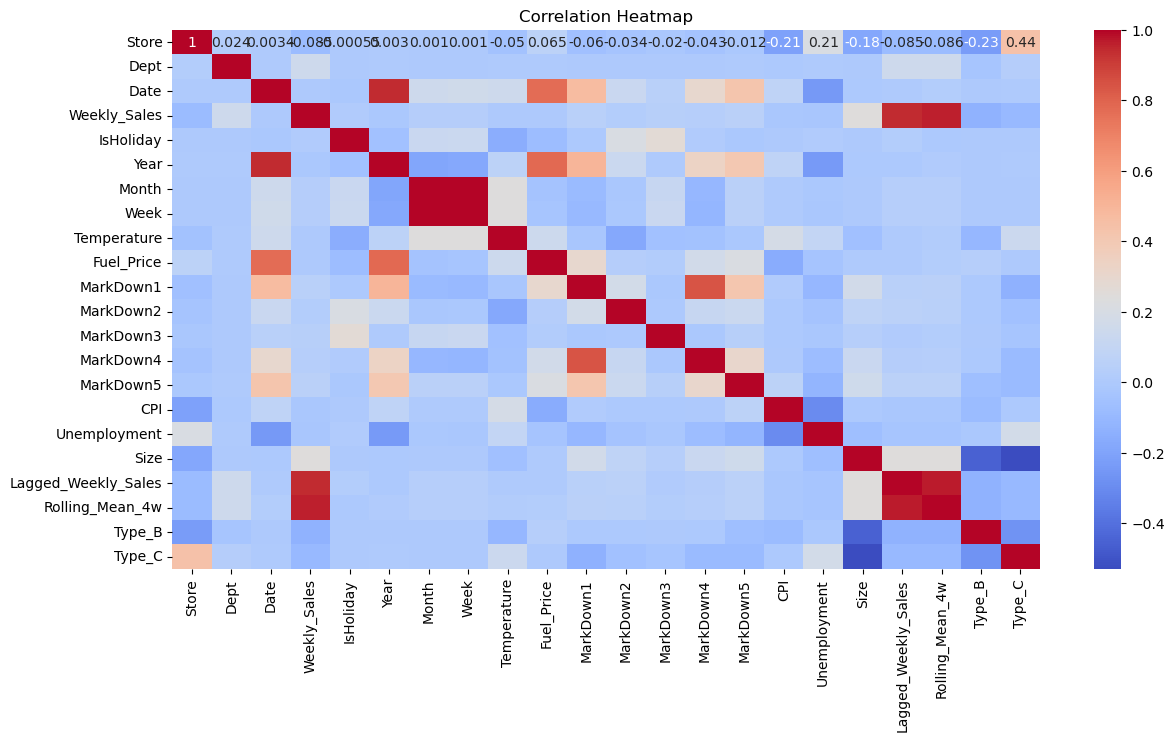

In [40]:
# Using the Correlation Heatmap to View.
plt.figure(figsize=(14, 7))
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Selecting the "Weekly_Sales" from the features. 
features = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Year', 
            'Month', 'Week', 'Lagged_Weekly_Sales', 'Rolling_Mean_4w', 'Type_B']
X = merged_data[features]
y = merged_data['Weekly_Sales']

In [42]:
X

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Year,Month,Week,Lagged_Weekly_Sales,Rolling_Mean_4w,Type_B
0,1,1,False,-0.912661,-1.933624,0.958510,0.190760,0.00,0.00,0.00,0.00,0.00,2010,2,5,0.00,0.0000,False
1,1,1,True,-1.116115,-1.989268,0.962165,0.190760,0.00,0.00,0.00,0.00,0.00,2010,2,6,24924.50,0.0000,False
2,1,1,False,-1.040087,-2.068098,0.963342,0.190760,0.00,0.00,0.00,0.00,0.00,2010,2,7,46039.49,0.0000,False
3,1,1,False,-0.681366,-1.959128,0.964106,0.190760,0.00,0.00,0.00,0.00,0.00,2010,2,8,41595.55,32990.7700,False
4,1,1,False,-0.688327,-1.810743,0.964871,0.190760,0.00,0.00,0.00,0.00,0.00,2010,3,9,19403.54,32216.6200,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,False,0.295747,1.370262,0.480194,0.498496,4556.61,20.64,1.50,1601.01,3288.25,2012,9,39,467.30,483.5175,True
421566,45,98,False,0.296282,1.342440,0.484126,0.489445,5046.74,0.00,18.82,2253.43,2340.01,2012,10,40,508.37,552.4325,True
421567,45,98,False,-0.261609,1.377218,0.488057,0.489445,1956.28,0.00,7.89,599.32,3990.54,2012,10,41,628.10,666.1975,True
421568,45,98,False,-0.154528,1.305344,0.488147,0.489445,2004.02,0.00,3.18,437.73,1537.49,2012,10,42,1061.02,739.3750,True


In [43]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [44]:
dates = merged_data['Date']

In [45]:
# Predicting the Unemployment Using Weekly_Sales with and without Markdown.
features_with_markdown = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_no_markdown = ['Weekly_Sales']
target = 'Unemployment'
dates = merged_data['Date']

X_with_md = merged_data[features_with_markdown]
X_no_md = merged_data[features_no_markdown]
y = merged_data[target]
X_with_md_train, X_with_md_val, y_train, y_val, dates_train, dates_val = train_test_split(X_with_md, y, dates, test_size=0.2, random_state=42)
X_no_md_train, X_no_md_val, _, _, _, _ = train_test_split(X_no_md, y, dates, test_size=0.2, random_state=42)

# Training the Random Forest model for Unemployment prediction with Markdowns.
rf_model_with_md = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_with_md.fit(X_with_md_train, y_train)
# Training a Random Forest model for Unemployment prediction without Markdowns.
rf_model_no_md = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_no_md.fit(X_no_md_train, y_train)

y_pred_with_md = rf_model_with_md.predict(X_with_md_val)
rmse_with_md = np.sqrt(mean_squared_error(y_val, y_pred_with_md))
mae_with_md = mean_absolute_error(y_val, y_pred_with_md)
print(f'Random Forest with Markdowns RMSE: {rmse_with_md}')
print(f'Random Forest with Markdowns MAE: {mae_with_md}')

Random Forest with Markdowns RMSE: 0.9384623430250667
Random Forest with Markdowns MAE: 0.533284923520462


In [46]:
# Simulate Unemployment without Markdown.
X_val_no_markdown = X_with_md_val.copy()
X_val_no_markdown[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = 0

# Predicting the Unemployment with MarkDowns.
unemployment_with_markdown = rf_model_with_md.predict(X_with_md_val)
# Predicting the Unemployment without Markdowns.
unemployment_without_markdown = rf_model_with_md.predict(X_val_no_markdown)

impact = unemployment_with_markdown - unemployment_without_markdown
print(f'Average impact of markdowns on Unemployment: {np.mean(impact)}')

Average impact of markdowns on Unemployment: -0.1721985759035781


In [47]:
unemployment_forecasts = rf_model_with_md.predict(X_with_md_val)
forecast_results = pd.DataFrame({
    'Date': dates_val,
    'Unemployment_Predicted': unemployment_forecasts
})
print("Unemployment Forecasts:")
print(forecast_results.head())

Unemployment Forecasts:
             Date  Unemployment_Predicted
272342 2012-01-06                2.363548
176581 2012-03-09                0.174255
354212 2011-05-27                0.350581
281444 2010-03-12                0.883459
124208 2010-10-29               -0.119521


In [48]:
# Project evaluation metrics for holiday weeks
holiday_weeks = merged_data[merged_data['IsHoliday'] == True]
y_holiday_true = holiday_weeks[target]
X_holiday_with_md = holiday_weeks[features_with_markdown]
X_holiday_no_md = holiday_weeks[features_no_markdown]

y_holiday_pred_with_md = rf_model_with_md.predict(X_holiday_with_md)
y_holiday_pred_no_md = rf_model_no_md.predict(X_holiday_no_md)

holiday_rmse_with_md = np.sqrt(mean_squared_error(y_holiday_true, y_holiday_pred_with_md))
holiday_mae_with_md = mean_absolute_error(y_holiday_true, y_holiday_pred_with_md)
holiday_rmse_no_md = np.sqrt(mean_squared_error(y_holiday_true, y_holiday_pred_no_md))
holiday_mae_no_md = mean_absolute_error(y_holiday_true, y_holiday_pred_no_md)
print(f'Holiday Weeks RMSE with Markdowns: {holiday_rmse_with_md}')
print(f'Holiday Weeks MAE with Markdowns: {holiday_mae_with_md}')
print(f'Holiday Weeks RMSE without Markdowns: {holiday_rmse_no_md}')
print(f'Holiday Weeks MAE without Markdowns: {holiday_mae_no_md}')

Holiday Weeks RMSE with Markdowns: 0.5401474745928669
Holiday Weeks MAE with Markdowns: 0.2675633641481804
Holiday Weeks RMSE without Markdowns: 0.7125563678443165
Holiday Weeks MAE without Markdowns: 0.46796972119304486


In [49]:
# Predicting the "Weekly_Sales" with and without Markdown.

merged_data['Date'] = pd.to_datetime(merged_data['Date'])
features = ['Store', 'Dept', 'IsHoliday', 'Weekly_Sales', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
X = merged_data[features]
y = merged_data['Weekly_Sales']
dates = merged_data['Date']
X_train, X_val, y_train, y_val, dates_train, dates_val = train_test_split(X, y, dates, test_size=0.2, random_state=42)

# Training the RandomForest model.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
print(f'Random Forest RMSE: {rmse}')
print(f'Random Forest MAE: {mae}')

Random Forest RMSE: 38.672816234513476
Random Forest MAE: 0.8518009737410741


In [50]:
# Sales without Markdown.
X_no_markdown = X_val.copy()
X_no_markdown[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = 0

# Predicting the sales with Markdown.
sales_with_markdown = rf_model.predict(X_val)
# Predicting the sales without Markdown.
sales_without_markdown = rf_model.predict(X_no_markdown)

impact = sales_with_markdown - sales_without_markdown
print(f'Average impact of markdowns: {np.mean(impact)}')

Average impact of markdowns: -0.03148712787918243


In [51]:
sales_forecasts = rf_model.predict(X_val)
forecast_results = pd.DataFrame({
    'Store': X_val['Store'],
    'Dept': X_val['Dept'],
    'Date': dates_val,
    'Weekly_Sales_Predicted': sales_forecasts
})
print("Sales Forecasts:")
print(forecast_results.head())

Sales Forecasts:
        Store  Dept       Date  Weekly_Sales_Predicted
272342     28    40 2012-01-06              50933.0021
176581     18    93 2012-03-09               3196.1128
354212     38     4 2011-05-27              10124.9870
281444     29    33 2010-03-12               3311.1815
124208     13    52 2010-10-29               6335.6870


In [52]:
holiday_weeks = merged_data[merged_data['IsHoliday'] == True]
y_holiday_true = holiday_weeks['Weekly_Sales']
X_holiday = holiday_weeks[features]
y_holiday_pred = rf_model.predict(X_holiday)

holiday_rmse = np.sqrt(mean_squared_error(y_holiday_true, y_holiday_pred))
holiday_mae = mean_absolute_error(y_holiday_true, y_holiday_pred)
print(f'Holiday Weeks RMSE: {holiday_rmse}')
print(f'Holiday Weeks MAE: {holiday_mae}')

Holiday Weeks RMSE: 255.120726092569
Holiday Weeks MAE: 4.749523057213148


In [53]:
# Predicting the  "CPI" using the features "Weekly_Sales" and "Unemployment" With and without MarkDowns.

features_with_md = ['Weekly_Sales', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_no_md = ['Weekly_Sales', 'Unemployment']
target = 'CPI'

X_with_md = merged_data[features_with_md]
X_no_md = merged_data[features_no_md]
y = merged_data[target]
dates = merged_data['Date']  # Assuming 'Date' column exists
X_with_md_train, X_with_md_val, y_train, y_val, dates_train, dates_val = train_test_split(X_with_md, y, dates, test_size=0.2, random_state=42)
X_no_md_train, X_no_md_val, _, _, _, _ = train_test_split(X_no_md, y, dates, test_size=0.2, random_state=42)

# Using the RandomForestRegressor, XGBRegressor, and LinearRegression.
rf_model_with_md = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model_with_md = XGBRegressor(n_estimators=100, random_state=42)
lr_model_with_md = LinearRegression()

rf_model_no_md = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model_no_md = XGBRegressor(n_estimators=100, random_state=42)
lr_model_no_md = LinearRegression()

rf_model_with_md.fit(X_with_md_train, y_train)
xgb_model_with_md.fit(X_with_md_train, y_train)
lr_model_with_md.fit(X_with_md_train, y_train)

rf_model_no_md.fit(X_no_md_train, y_train)
xgb_model_no_md.fit(X_no_md_train, y_train)
lr_model_no_md.fit(X_no_md_train, y_train)

# The models with Markdown.
y_pred_rf_with_md = rf_model_with_md.predict(X_with_md_val)
y_pred_xgb_with_md = xgb_model_with_md.predict(X_with_md_val)
y_pred_lr_with_md = lr_model_with_md.predict(X_with_md_val)

rmse_rf_with_md = np.sqrt(mean_squared_error(y_val, y_pred_rf_with_md))
mae_rf_with_md = mean_absolute_error(y_val, y_pred_rf_with_md)
rmse_xgb_with_md = np.sqrt(mean_squared_error(y_val, y_pred_xgb_with_md))
mae_xgb_with_md = mean_absolute_error(y_val, y_pred_xgb_with_md)

rmse_lr_with_md = np.sqrt(mean_squared_error(y_val, y_pred_lr_with_md))
mae_lr_with_md = mean_absolute_error(y_val, y_pred_lr_with_md)
print("CPI Prediction Metrics with Markdowns:")
print(f"Random Forest RMSE: {rmse_rf_with_md}, MAE: {mae_rf_with_md}")
print(f"XGBoost RMSE: {rmse_xgb_with_md}, MAE: {mae_xgb_with_md}")
print(f"Linear Regression RMSE: {rmse_lr_with_md}, MAE: {mae_lr_with_md}")

CPI Prediction Metrics with Markdowns:
Random Forest RMSE: 0.22333846208697045, MAE: 0.04191791692669299
XGBoost RMSE: 0.32435738057510377, MAE: 0.15635141918845438
Linear Regression RMSE: 0.9358266386793035, MAE: 0.8822620951320953


In [54]:
# The models without Markdown.
y_pred_rf_no_md = rf_model_no_md.predict(X_no_md_val)
y_pred_xgb_no_md = xgb_model_no_md.predict(X_no_md_val)
y_pred_lr_no_md = lr_model_no_md.predict(X_no_md_val)

rmse_rf_no_md = np.sqrt(mean_squared_error(y_val, y_pred_rf_no_md))
mae_rf_no_md = mean_absolute_error(y_val, y_pred_rf_no_md)
rmse_xgb_no_md = np.sqrt(mean_squared_error(y_val, y_pred_xgb_no_md))
mae_xgb_no_md = mean_absolute_error(y_val, y_pred_xgb_no_md)

rmse_lr_no_md = np.sqrt(mean_squared_error(y_val, y_pred_lr_no_md))
mae_lr_no_md = mean_absolute_error(y_val, y_pred_lr_no_md)
print("CPI Prediction Metrics without Markdowns:")
print(f"Random Forest RMSE: {rmse_rf_no_md}, MAE: {mae_rf_no_md}")
print(f"XGBoost RMSE: {rmse_xgb_no_md}, MAE: {mae_xgb_no_md}")
print(f"Linear Regression RMSE: {rmse_lr_no_md}, MAE: {mae_lr_no_md}")

CPI Prediction Metrics without Markdowns:
Random Forest RMSE: 0.27487166409948494, MAE: 0.06402385764140228
XGBoost RMSE: 0.44781506576189617, MAE: 0.24241193535961947
Linear Regression RMSE: 0.9374739456575142, MAE: 0.884696393483873


In [55]:
# Sales without Markdown.
X_no_markdown = X_with_md_val.copy()
X_no_markdown[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = 0

# Predicting the CPI with Markdown.using the Random Forest model.
cpi_with_markdown = rf_model_with_md.predict(X_with_md_val)
# Predicting the CPI without Markdown. using the Random Forest model.
cpi_without_markdown = rf_model_with_md.predict(X_no_markdown)

impact = cpi_with_markdown - cpi_without_markdown
print(f'Average impact of markdowns: {np.mean(impact)}')

Average impact of markdowns: 0.10210020785900113


In [56]:
cpi_forecasts = rf_model_with_md.predict(X_with_md_val)
forecast_results = pd.DataFrame({
    'Date': dates_val,
    'CPI_Predicted': cpi_forecasts
})

print("CPI Forecasts:")
print(forecast_results.head())

CPI Forecasts:
             Date  CPI_Predicted
272342 2012-01-06      -1.070244
176581 2012-03-09      -0.886035
354212 2011-05-27      -1.098592
281444 2010-03-12      -1.032859
124208 2010-10-29      -1.158089


In [58]:
# To train the model.And predicting with and Without 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'.
def train_and_evaluate(X_train, X_val, y_train, y_val, feature_set, target):
    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train[feature_set], y_train)

    y_pred = rf_model.predict(X_val[feature_set])
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    print(f'Random Forest RMSE for {target}: {rmse}')
    print(f'Random Forest MAE for {target}: {mae}')

    # Predicting the values with and without Markdown.
    if 'MarkDown1' in feature_set:
        X_no_markdown = X_val.copy()
        X_no_markdown[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = 0
        values_with_markdown = rf_model.predict(X_val[feature_set])
        values_without_markdown = rf_model.predict(X_no_markdown[feature_set])
        impact = values_with_markdown - values_without_markdown
        print(f'Average impact of markdowns for {target}: {np.mean(impact)}')

In [59]:
feature_sets = {
    'MarkDown1': ['Weekly_Sales', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
    'MarkDown2': ['Weekly_Sales', 'MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
    'MarkDown3': ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
    'MarkDown4': ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5', 'CPI', 'Unemployment'],
    'MarkDown5': ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'CPI', 'Unemployment']
}

# Train the models for each Markdown.
for target, features in feature_sets.items():
    print(f'\nTraining model to predict {target} with markdowns...')
    X_train, X_val, y_train, y_val = train_test_split(merged_data, merged_data[target], test_size=0.2, random_state=42)
    train_and_evaluate(X_train, X_val, y_train, y_val, features, target)


Training model to predict MarkDown1 with markdowns...
Random Forest RMSE for MarkDown1: 9.779356970978873e-12
Random Forest MAE for MarkDown1: 3.250995594895498e-12

Training model to predict MarkDown2 with markdowns...
Random Forest RMSE for MarkDown2: 5.16584549005375e-05
Random Forest MAE for MarkDown2: 1.7790743594017118e-07
Average impact of markdowns for MarkDown2: 896.4437133216313

Training model to predict MarkDown3 with markdowns...
Random Forest RMSE for MarkDown3: 3.781622826972763
Random Forest MAE for MarkDown3: 0.02284385036953709
Average impact of markdowns for MarkDown3: 486.9551471096139

Training model to predict MarkDown4 with markdowns...
Random Forest RMSE for MarkDown4: 0.0009556677640788538
Random Forest MAE for MarkDown4: 7.359395966952863e-06
Average impact of markdowns for MarkDown4: 1098.5204094278527

Training model to predict MarkDown5 with markdowns...
Random Forest RMSE for MarkDown5: 5.227016388625435e-12
Random Forest MAE for MarkDown5: 1.939029781359

In [60]:
# Removeing the Markdown.
no_md_feature_sets = {
    'MarkDown1': ['Weekly_Sales', 'CPI', 'Unemployment'],
    'MarkDown2': ['Weekly_Sales', 'CPI', 'Unemployment'],
    'MarkDown3': ['Weekly_Sales', 'CPI', 'Unemployment'],
    'MarkDown4': ['Weekly_Sales', 'CPI', 'Unemployment'],
    'MarkDown5': ['Weekly_Sales', 'CPI', 'Unemployment']
}

# Training the models for Markdown without Markdown.
for target, features in no_md_feature_sets.items():
    print(f'\nTraining model to predict {target} without markdowns...')
    X_train, X_val, y_train, y_val = train_test_split(merged_data, merged_data[target], test_size=0.2, random_state=42)
    train_and_evaluate(X_train, X_val, y_train, y_val, features, target)


Training model to predict MarkDown1 without markdowns...
Random Forest RMSE for MarkDown1: 2397.4217677555234
Random Forest MAE for MarkDown1: 556.3606874314763

Training model to predict MarkDown2 without markdowns...
Random Forest RMSE for MarkDown2: 2074.1302329867976
Random Forest MAE for MarkDown2: 212.10881531936224

Training model to predict MarkDown3 without markdowns...
Random Forest RMSE for MarkDown3: 2422.9907206933667
Random Forest MAE for MarkDown3: 129.18869780099533

Training model to predict MarkDown4 without markdowns...
Random Forest RMSE for MarkDown4: 1454.908624846884
Random Forest MAE for MarkDown4: 263.5082875825858

Training model to predict MarkDown5 without markdowns...
Random Forest RMSE for MarkDown5: 2410.893133261136
Random Forest MAE for MarkDown5: 438.6577377763063
